In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

df = pd.read_csv('raw_data/raw_data_first_version_with_good_target.csv')
# features and target selection
X_scaled = pd.DataFrame()
X_scaled = df.drop(columns=['Ratio ticker sp500'])
X_scaled = X_scaled.set_index('Ticker')


#selecting just the 40 first columns (data for the year 23)

X = X_scaled[X_scaled.columns[:40].to_list()]

In [31]:
y = df[['Ticker', 'Ratio ticker sp500']].set_index('Ticker')['Ratio ticker sp500']

In [33]:
X

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,...,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,8.004987,7.515304,55.734768,-23.148653,15.145524,-27.907990,-23.064565,139.337965,-5.430906,13.420363,...,116.490645,-91.952321,102.375756,-0.137027,-0.137658,18.518459,9.260858,12.168475,26.514222,1.984273
AAOI,0.018042,-0.022246,-0.007525,0.157374,-0.075072,0.088309,0.156803,-0.045400,-0.056036,-0.088785,...,0.428972,-0.609874,0.468973,-0.081874,1.673182,0.001723,0.017559,0.098365,-0.027057,-0.125151
AAON,0.580131,0.508216,-0.104489,0.922258,0.171553,0.751386,0.918908,0.068675,0.460284,0.185325,...,0.960711,-0.982697,0.917387,-0.007824,2.697467,0.328336,0.648570,0.647806,-0.185893,-0.303681
AAPL,201.101827,189.747335,152.564180,125.139545,96.077914,-5.861826,124.684969,-0.150992,61.394917,89.189982,...,131.600684,-295.410361,193.144485,-0.137027,513.638792,198.158251,284.819789,179.874584,216.702488,118.367510
ABCB,0.418674,0.398206,0.705827,4.428940,2.002865,-0.170596,4.412852,-0.150992,3.130939,2.056340,...,0.462412,-0.306574,0.364981,-0.137027,0.451183,-0.236801,-0.208136,-0.194984,-0.186904,4.318132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,1.444057,1.323533,2.667988,8.199904,3.808738,-0.170596,9.054724,-0.079099,4.941048,3.284907,...,4.030591,-4.179320,3.928660,-0.137027,6.980449,-0.236801,1.581906,-0.194984,-0.186904,8.423826
ZKIN,-0.476477,-0.488941,-0.173992,-0.258718,-0.258624,-0.170596,-0.257779,-0.150992,-0.269239,-0.254178,...,-0.190090,0.199530,-0.204937,-0.137027,-0.137658,-0.236801,-0.208136,-0.194984,-0.186904,-0.304817
ZLAB,12.126837,11.465329,-0.153160,1.314480,0.184102,2.235725,1.309705,0.121318,0.520706,0.198146,...,0.016991,0.073852,-0.038201,0.541414,-0.129484,1.061648,0.097214,0.166272,2.654630,2.824469


In [32]:
df['pipeline__2019 Ratio ticker sp500']

0      -0.294649
1      -0.507405
2       0.470169
3       0.247422
4       0.368546
          ...   
1557    0.273506
1558   -0.889590
1559    1.121664
1560    2.542868
1561   -1.598561
Name: pipeline__2019 Ratio ticker sp500, Length: 1562, dtype: float64

## Train test split using 0.2 for the test

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head(10)

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,pipeline__2023 Total Equity Gross Minority Interest,pipeline__2023 Stockholders Equity,pipeline__2023 Gains Losses Not Affecting Retained Earnings,pipeline__2023 Retained Earnings,pipeline__2023 Additional Paid In Capital,pipeline__2023 Capital Stock,pipeline__2023 Common Stock,pipeline__2023 Total Liabilities Net Minority Interest,pipeline__2023 Total Non Current Liabilities Net Minority Interest,pipeline__2023 Long Term Debt And Capital Lease Obligation
Ticker,,,,,,,,,,,,,,,,,,,,
RYAAY,14.284370,13.441371,5.485493,10.830914,5.053416,-5.104520,10.791570,3.556852,5.329314,4.572648,4.937666,5.310976,1.379172,5.893233,1.196920,0.990438,1.964170,4.178011,5.693983,4.674507
SCVL,-0.124329,0.013247,0.297922,0.711733,0.033648,0.850159,0.709148,6.017867,0.252254,0.044430,0.220331,0.247548,0.023269,0.909233,-0.237389,0.020768,0.058150,-0.025138,0.426407,0.297977
KALV,-0.033510,-0.070898,-0.162673,0.066198,-0.169077,0.343294,0.065958,-0.003037,-0.109463,-0.162690,-0.115756,-0.113197,-0.110572,-0.499145,0.231367,-0.035410,-0.052276,-0.205532,-0.093887,-0.147378
SHEN,0.175208,0.126077,0.310991,0.894550,0.271106,0.083307,0.891300,0.798597,0.378370,0.283005,0.337512,0.373326,0.096225,0.811178,-0.255633,-0.040490,-0.062261,0.014589,0.697634,0.390088
LWAY,-0.286035,-0.277614,-0.169970,-0.174306,-0.223495,-0.100093,-0.173673,-0.147541,-0.209272,-0.218998,-0.208494,-0.212738,0.023269,0.078715,-0.324343,0.932019,1.849339,-0.205923,-0.098301,-0.156262
MESA,0.054240,0.011915,0.569862,0.144914,0.146396,-0.593093,0.144388,0.077877,-0.070754,0.066699,-0.079790,-0.074593,0.023269,-0.114785,-0.329681,40.472733,79.572100,0.070446,0.640918,0.440240
FRPT,0.149166,0.101671,0.410429,1.665162,0.490189,0.933989,1.659113,0.423805,0.676822,0.510869,0.614818,0.670976,-0.002581,-0.478863,1.089701,-0.033318,-0.048164,-0.006058,0.625679,0.516979
GROW,-0.287666,-0.293989,-0.173901,-0.153397,-0.229597,-0.048294,-0.152840,-0.149805,-0.217448,-0.224523,-0.216090,-0.220893,0.082229,0.039073,-0.311491,0.019124,0.054919,-0.213163,-0.105354,-0.158766
ROAD,0.207022,0.156503,0.363230,0.422862,0.237598,0.464002,0.421326,0.118371,0.243330,0.244279,0.212039,0.238648,0.840922,0.333781,-0.033931,-0.032123,-0.045815,0.072347,0.629434,0.439493


In [7]:
X.shape

(1562, 20)

## Features selection 

In [8]:
len(X_train.columns)

20

In [ ]:
sns.pairplot(X_train)

In [ ]:
sns.histplot(y_train, bins=30)

In [ ]:
y 

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
y_train


In [44]:

feature_names = X.columns.to_list()

# Select the best 2 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

# Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_new, columns=selected_features)

/Users/guillaumegavillet/.pyenv/versions/3.10.6/envs/project_env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [45]:
X_selected_df 

,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents
0,116.490645,-91.952321,102.375756,-0.137027,-0.137658,18.518459,9.260858,12.168475,26.514222,1.984273
1,0.428972,-0.609874,0.468973,-0.081874,1.673182,0.001723,0.017559,0.098365,-0.027057,-0.125151
2,0.960711,-0.982697,0.917387,-0.007824,2.697467,0.328336,0.648570,0.647806,-0.185893,-0.303681
3,131.600684,-295.410361,193.144485,-0.137027,513.638792,198.158251,284.819789,179.874584,216.702488,118.367510
4,0.462412,-0.306574,0.364981,-0.137027,0.451183,-0.236801,-0.208136,-0.194984,-0.186904,4.318132
...,...,...,...,...,...,...,...,...,...,...
1557,4.030591,-4.179320,3.928660,-0.137027,6.980449,-0.236801,1.581906,-0.194984,-0.186904,8.423826
1558,-0.190090,0.199530,-0.204937,-0.137027,-0.137658,-0.236801,-0.208136,-0.194984,-0.186904,-0.304817
1559,0.016991,0.073852,-0.038201,0.541414,-0.129484,1.061648,0.097214,0.166272,2.654630,2.824469
1560,0.753612,-0.536217,0.620854,3.720426,0.717302,3.757348,2.514953,3.360493,7.213275,4.693979


<Axes: >

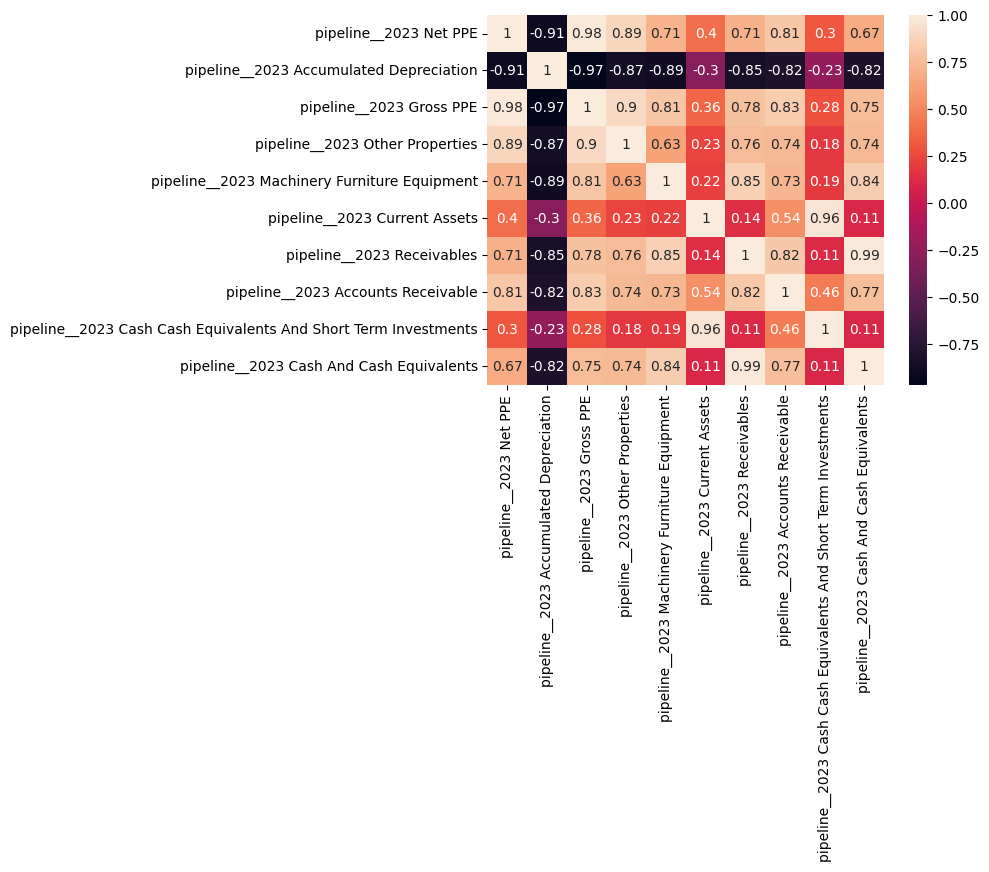

In [37]:
sns.heatmap(X_selected_df.corr(), annot=True)

In [ ]:
sns.pairplot(X_selected_df)

In [38]:
X_selected_df

,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents
0,30.313377,-23.224814,26.342710,2.157548,100.700007,7.932212,0.070887,0.169329,16.216776,13.949723
1,1.196847,-0.778489,0.966921,3.359286,1.192739,0.412313,-0.193871,-0.176359,0.034981,-0.101366
2,-0.157621,0.187194,-0.181775,-0.024811,-0.133414,0.001338,-0.120998,-0.194984,0.339419,-0.082094
3,2.614067,-1.915693,2.220128,9.193278,2.078520,0.006513,-0.093755,-0.074266,0.303761,0.246683
4,-0.120883,0.041199,-0.102150,-0.134920,0.094254,-0.184018,-0.143287,-0.110313,-0.140401,-0.252548
...,...,...,...,...,...,...,...,...,...,...
1244,-0.185493,0.193787,-0.200041,-0.117812,-0.130304,-0.231713,-0.202055,-0.187045,-0.181612,-0.298869
1245,-0.189362,0.199024,-0.204324,-0.137027,-0.136784,-0.223663,-0.207224,-0.194984,-0.157144,-0.271368
1246,1.156427,-1.085809,1.068633,-0.137027,2.423102,25.332674,22.811502,23.872875,9.766009,10.090027
1247,-0.189237,0.169958,-0.192496,-0.098652,-0.133722,-0.232173,-0.203644,-0.189119,-0.181496,-0.298738


## Cross validation 

### cross validation on the full data

In [ ]:
# features selection for the cross validation
X = X_train
y = y_train

In [ ]:
# cross validation on the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores

### cross validation on the features selected

In [ ]:
# features selection for the cross validation
## features selected using only year 2023 and using SelectKBest with k = 10
X_reduced = X_selected_df.drop(columns = ['pipeline__2023 Accumulated Depreciation'])
X_reduced

In [ ]:
X = X_reduced
y = y_train

In [ ]:
# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert negative MSE to positive for easier interpretation
scores

## classification unsupervised


In [ ]:
# features selection for the cross validation
X=pd.DataFrame()
X = X_train
y = y_train

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Apply K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(X)



In [ ]:

# Add the cluster labels to the original DataFrame
X['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')



In [ ]:
# Plot the clusters (for visualization, use the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
sns.histplot(X['Cluster'])

In [10]:
y

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1557   NaN
1558   NaN
1559   NaN
1560   NaN
1561   NaN
Name: binary_target, Length: 1562, dtype: float64

## Neural network

In [17]:
# binary classification
# Define the threshold
threshold = 1.0  # Set your desired threshold value

# Create the binary target column
df['binary_target'] = (df['Ratio ticker sp500'] > threshold).astype(int)

# Prepare the target
y = df['binary_target']


In [23]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1557    1
1558    0
1559    0
1560    1
1561    0
Name: binary_target, Length: 1562, dtype: int64

In [28]:
X_train.shape[1]

20

In [29]:
X_train

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,pipeline__2023 Total Equity Gross Minority Interest,pipeline__2023 Stockholders Equity,pipeline__2023 Gains Losses Not Affecting Retained Earnings,pipeline__2023 Retained Earnings,pipeline__2023 Additional Paid In Capital,pipeline__2023 Capital Stock,pipeline__2023 Common Stock,pipeline__2023 Total Liabilities Net Minority Interest,pipeline__2023 Total Non Current Liabilities Net Minority Interest,pipeline__2023 Long Term Debt And Capital Lease Obligation
Ticker,,,,,,,,,,,,,,,,,,,,
RYAAY,14.284370,13.441371,5.485493,10.830914,5.053416,-5.104520,10.791570,3.556852,5.329314,4.572648,4.937666,5.310976,1.379172,5.893233,1.196920,0.990438,1.964170,4.178011,5.693983,4.674507
SCVL,-0.124329,0.013247,0.297922,0.711733,0.033648,0.850159,0.709148,6.017867,0.252254,0.044430,0.220331,0.247548,0.023269,0.909233,-0.237389,0.020768,0.058150,-0.025138,0.426407,0.297977
KALV,-0.033510,-0.070898,-0.162673,0.066198,-0.169077,0.343294,0.065958,-0.003037,-0.109463,-0.162690,-0.115756,-0.113197,-0.110572,-0.499145,0.231367,-0.035410,-0.052276,-0.205532,-0.093887,-0.147378
SHEN,0.175208,0.126077,0.310991,0.894550,0.271106,0.083307,0.891300,0.798597,0.378370,0.283005,0.337512,0.373326,0.096225,0.811178,-0.255633,-0.040490,-0.062261,0.014589,0.697634,0.390088
LWAY,-0.286035,-0.277614,-0.169970,-0.174306,-0.223495,-0.100093,-0.173673,-0.147541,-0.209272,-0.218998,-0.208494,-0.212738,0.023269,0.078715,-0.324343,0.932019,1.849339,-0.205923,-0.098301,-0.156262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRPO,-0.458068,-0.471567,-0.172457,-0.255468,-0.250410,-0.168829,-0.254540,-0.137063,-0.254922,-0.245920,-0.250909,-0.258266,0.023269,-0.152987,-0.205149,-0.038398,-0.058150,-0.213083,-0.105366,-0.157976
SNGX,-0.341942,-0.361976,-0.169187,-0.253629,-0.255408,-0.159635,-0.252707,-0.146793,-0.266736,-0.252171,-0.261887,-0.270049,0.024242,-0.333257,-0.077227,-0.038939,-0.059214,-0.211613,-0.104339,-0.157028
LX,3.778823,4.069739,7.404167,17.523789,8.183522,20.014715,17.460133,0.584862,9.365557,5.819568,8.687928,9.336382,47.831256,8.098812,3.216010,-0.004632,0.008223,5.266450,1.813445,1.411642


In [48]:
X_selected_df.columns 

Index(['pipeline__2023 Net PPE', 'pipeline__2023 Accumulated Depreciation',
       'pipeline__2023 Gross PPE', 'pipeline__2023 Other Properties',
       'pipeline__2023 Machinery Furniture Equipment',
       'pipeline__2023 Current Assets', 'pipeline__2023 Receivables',
       'pipeline__2023 Accounts Receivable',
       'pipeline__2023 Cash Cash Equivalents And Short Term Investments',
       'pipeline__2023 Cash And Cash Equivalents'],
      dtype='object')

In [50]:
X_col = X_selected_df[['pipeline__2023 Cash And Cash Equivalents','pipeline__2023 Gross PPE','pipeline__2023 Current Assets']]

In [51]:
X_col

,pipeline__2023 Cash And Cash Equivalents,pipeline__2023 Gross PPE,pipeline__2023 Current Assets
0,1.984273,102.375756,18.518459
1,-0.125151,0.468973,0.001723
2,-0.303681,0.917387,0.328336
3,118.367510,193.144485,198.158251
4,4.318132,0.364981,-0.236801
...,...,...,...
1557,8.423826,3.928660,-0.236801
1558,-0.304817,-0.204937,-0.236801
1559,2.824469,-0.038201,1.061648
1560,4.693979,0.620854,3.757348


In [42]:
y.shape

(1562,)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# try a neural network 
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/100


/Users/guillaumegavillet/.pyenv/versions/3.10.6/envs/project_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2752 - val_accuracy: 0.0000e+00 - val_loss: 0.6811
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.0000e+00 - loss: -1.6966 - val_accuracy: 0.0000e+00 - val_loss: 0.6652
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.0000e+00 - loss: -5.3393 - val_accuracy: 0.0000e+00 - val_loss: 0.6822
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.0000e+00 - loss: -1.3526 - val_accuracy: 0.0000e+00 - val_loss: 0.7264
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.0000e+00 - loss: -1.2935 - val_accuracy: 0.0000e+00 - val_loss: 0.8203
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.0000e+00 - loss: -3.9985 - val_accuracy: 0.0000e+00 - val_loss: 1.0094
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.0000e+00 - loss: -13.3858 - val_accuracy: 0.0000e+00 - val_loss: 1.2095
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/